# LIFE EXPECTANCY AND GDP

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('all_data.csv')
print(data.head(10))

print(data.shape)
print(data.isnull().any())

print(data.describe())

data = data.rename(columns={'Life expectancy at birth (years)':'life_exp'})
data.head()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11
(96, 4)
Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
dtype: bool
              Year  Life expectancy at birth (years)           GDP
count    96.000000                       

,Country,Year,life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data['Country'].value_counts()

Mexico                      16
United States of America    16
Zimbabwe                    16
Germany                     16
Chile                       16
China                       16
Name: Country, dtype: int64

## Summary Statistics on the Data

### Boxplot of Country and life expectancy

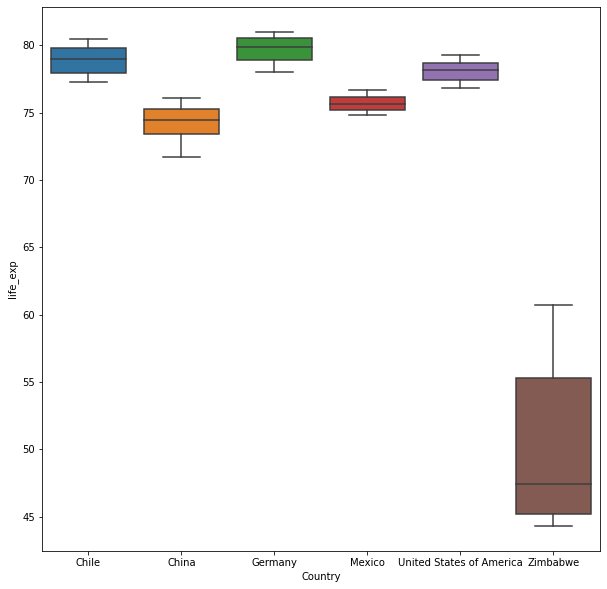

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,10])
sns.boxplot(data=data, x='Country', y='life_exp')
plt.show()

### Visualizing life expectancy in each country

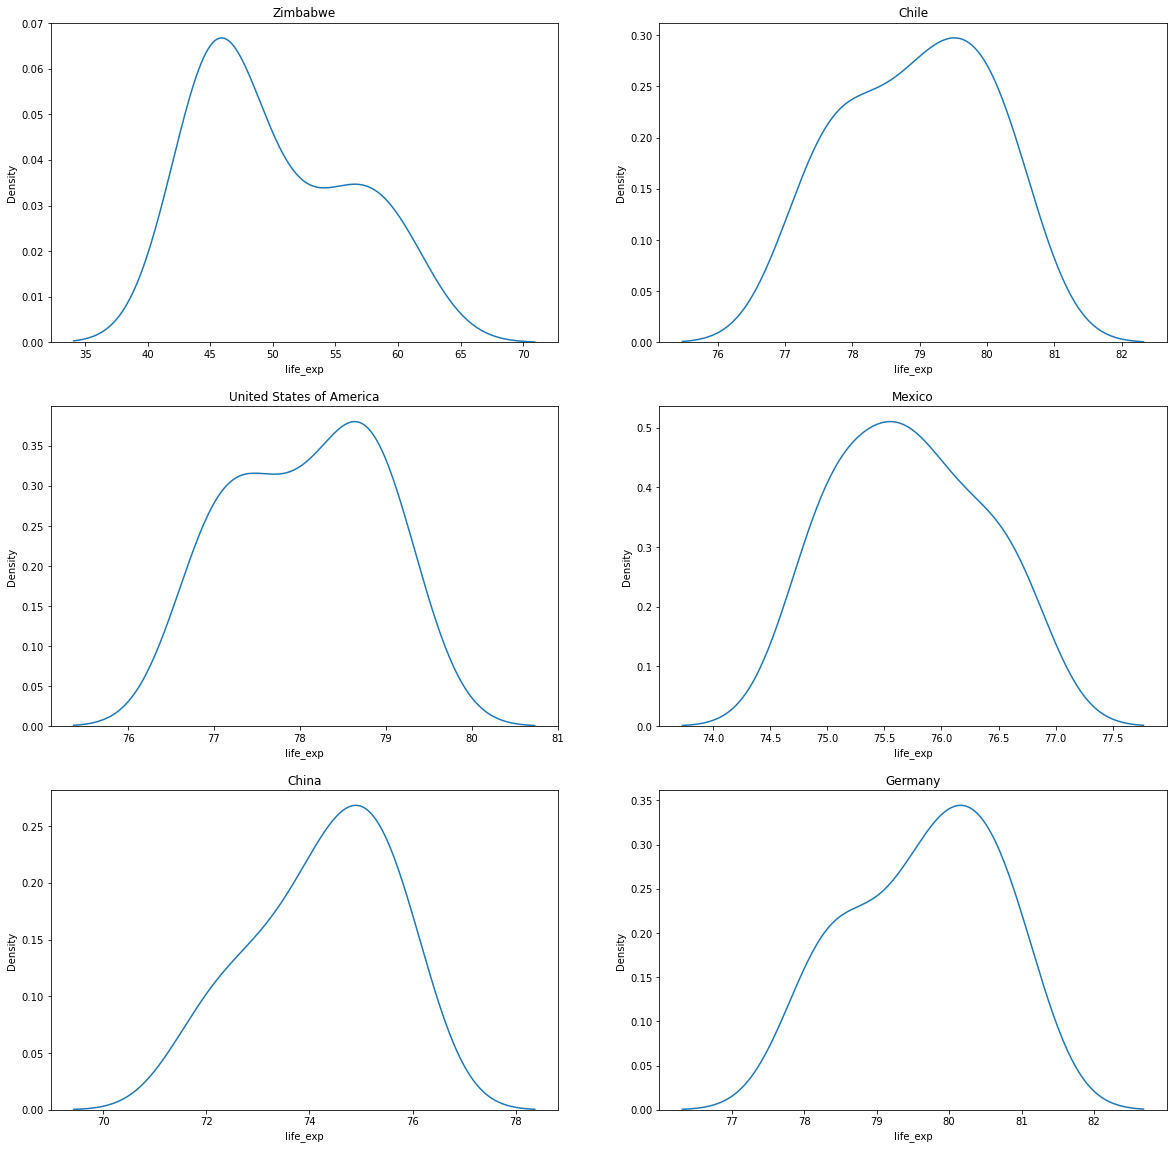

In [29]:
countries = ['Zimbabwe', 'Chile', 'United States of America', 'Mexico','China','Germany']
plt.figure(figsize=[20,20])
a = 1
for country in countries:
    plt.subplot(3,2,a)
    df = data[data.Country == country]
    sns.kdeplot(df.life_exp)
    plt.title(country)
    a += 1 
plt.show()

### Visualizing Life Expectancy Vrs Year in each Country

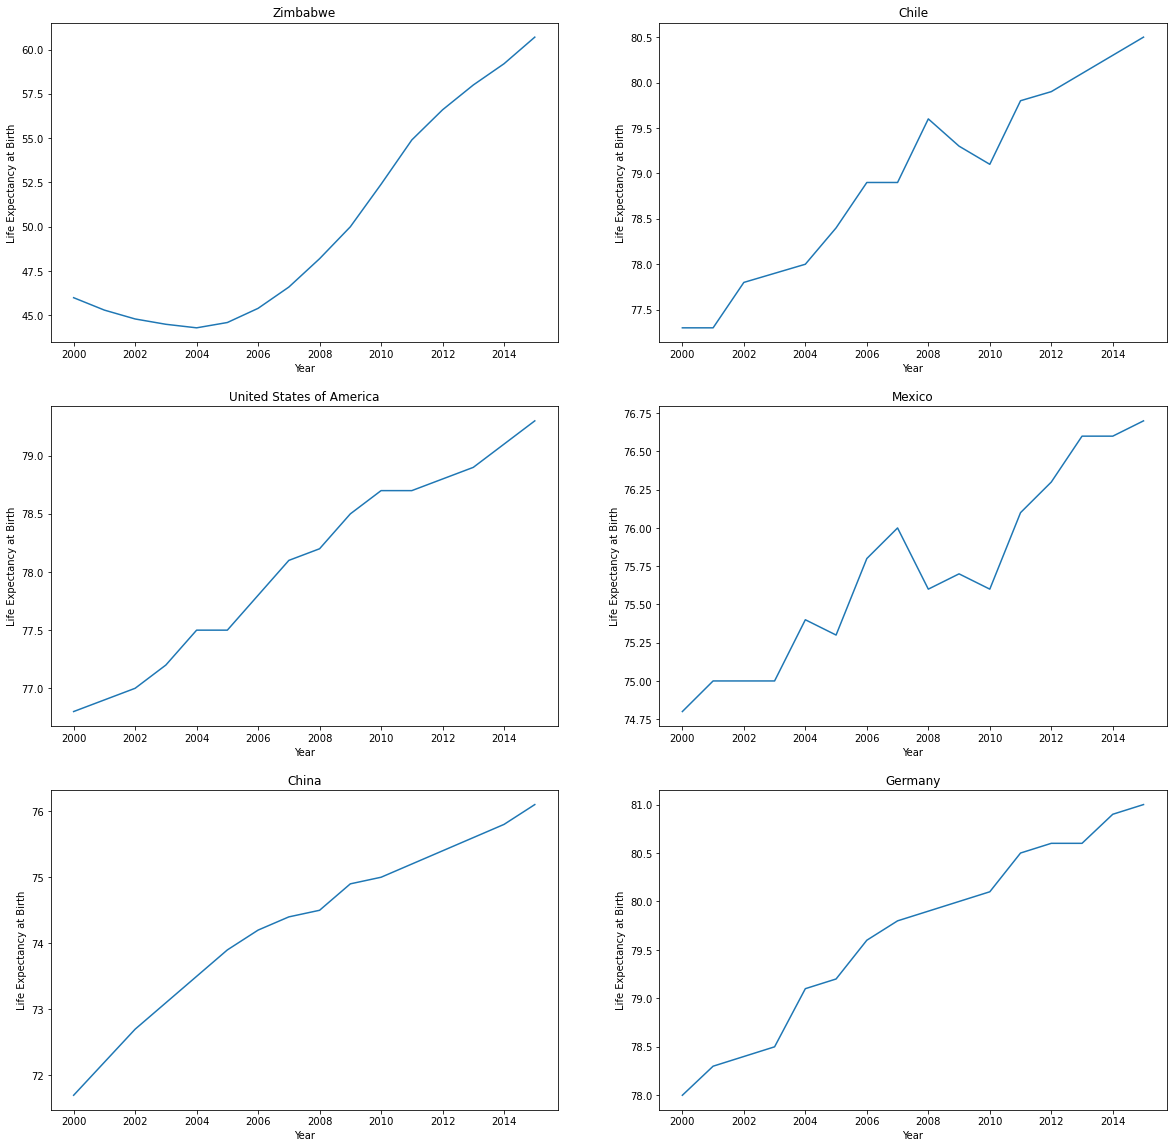

In [30]:
countries = ['Zimbabwe', 'Chile', 'United States of America', 'Mexico','China','Germany']
plt.figure(figsize=[20,20])
a = 1
for country in countries:
    plt.subplot(3,2,a)
    df = data[data.Country == country]
    plt.plot(df.Year, df.life_exp)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy at Birth')
    plt.title(country)
    a += 1 
plt.show()

### Boxplot of Country and life expectancy

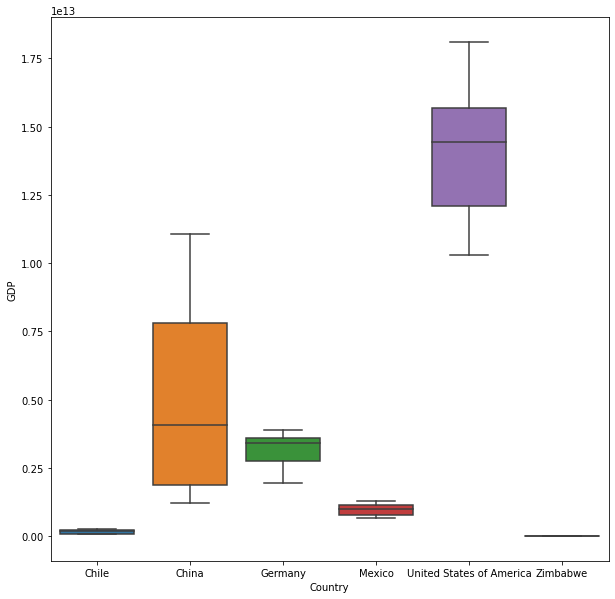

In [31]:
plt.figure(figsize=[10,10])
sns.boxplot(data=data, x='Country', y='GDP')
plt.show()

### Visualizing GDP Vrs Year in each Country

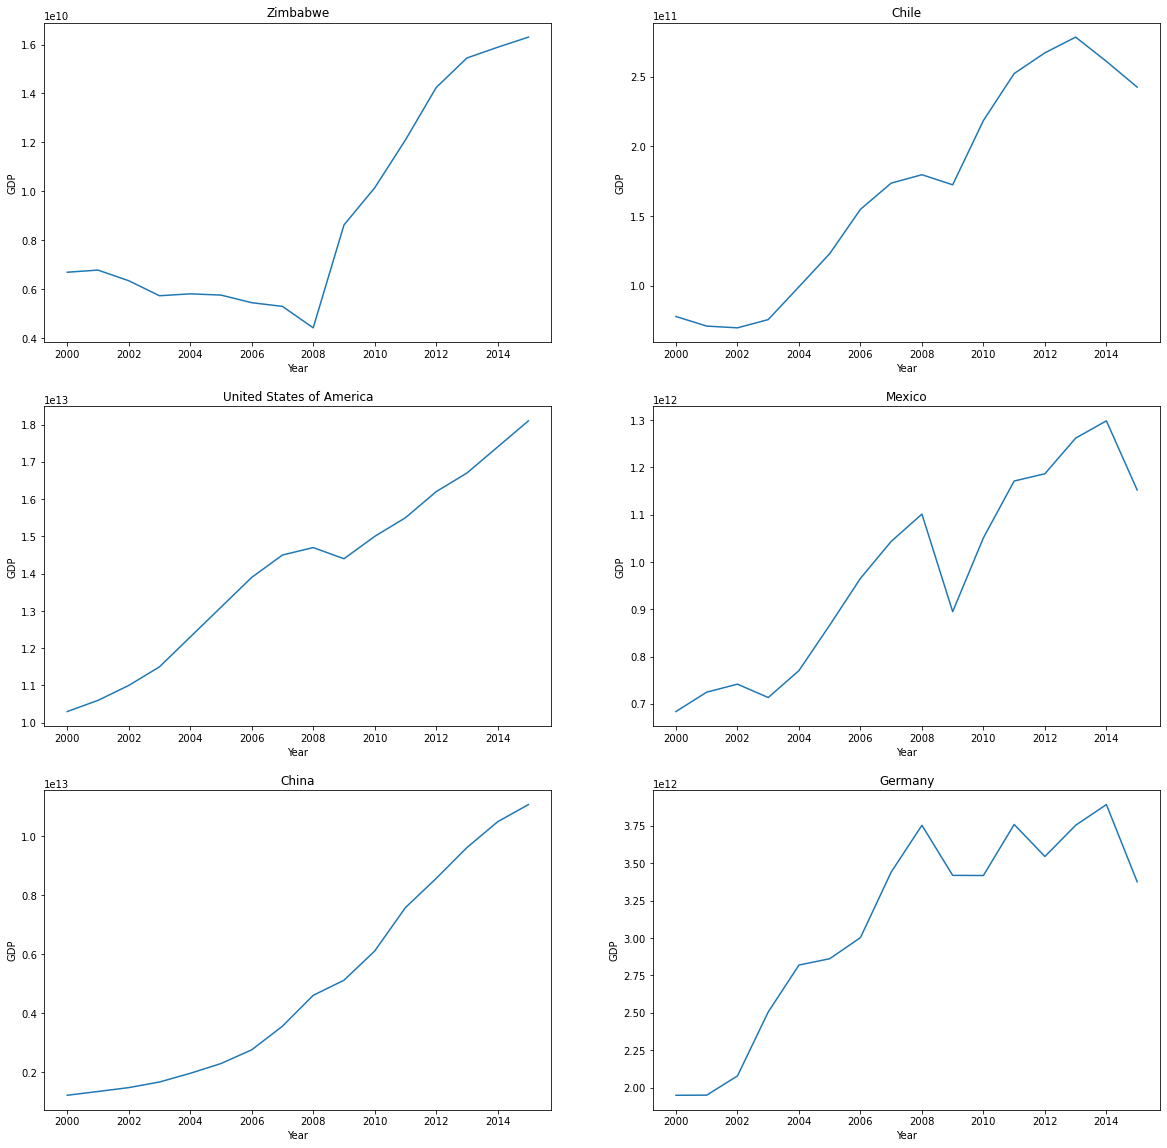

In [32]:
countries = ['Zimbabwe', 'Chile', 'United States of America', 'Mexico','China','Germany']
plt.figure(figsize=[20,20])
a = 1
for country in countries:
    plt.subplot(3,2,a)
    df = data[data.Country == country]
    plt.plot(df.Year, df.GDP)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title(country)
    a += 1 
plt.show()

### Visualizing Life Expectancy Vrs GDP in each Country

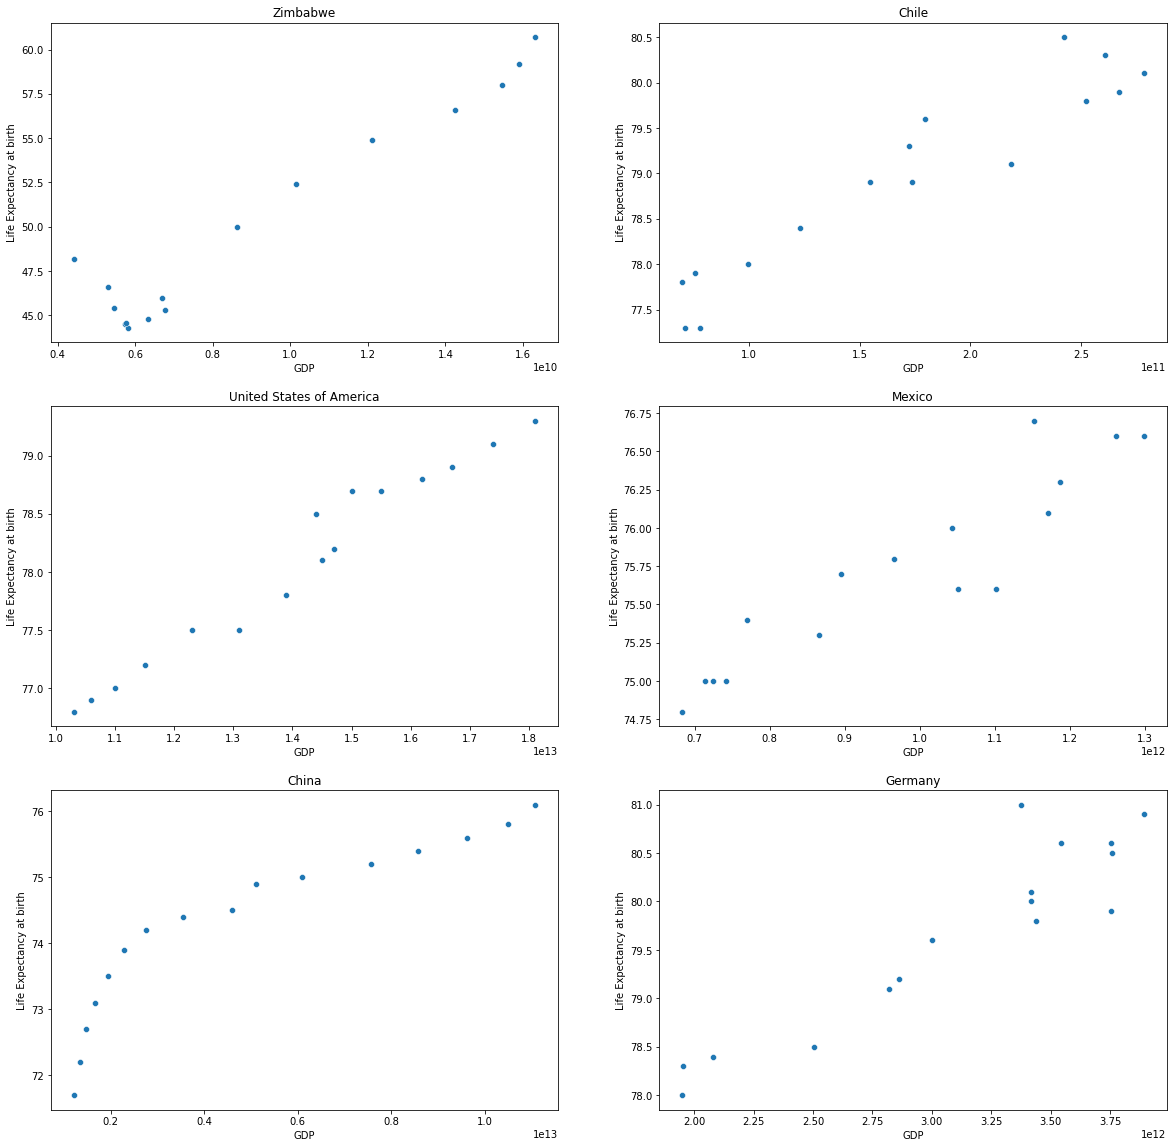

In [33]:
countries = ['Zimbabwe', 'Chile', 'United States of America', 'Mexico','China','Germany']
plt.figure(figsize=[20,20])
a = 1
for country in countries:
    plt.subplot(3,2,a)
    df = data[data.Country == country]
    sns.scatterplot(data=df, x='GDP', y='life_exp')
    #plt.xlabel('Year')
    plt.ylabel('Life Expectancy at birth')
    plt.title(country)
    a += 1 
plt.show()

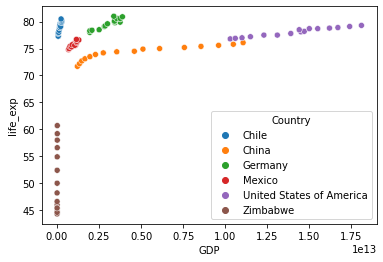

In [34]:

sns.scatterplot(data=data, x='GDP', y='life_exp', hue='Country')
plt.show()

In [35]:
from scipy.stats import pearsonr

corr, p = pearsonr(data.GDP, data.life_exp)
print(corr)

0.343206748449156


In [39]:
countries = ['Zimbabwe', 'Chile', 'United States of America', 'Mexico','China','Germany']
for country in countries:
    df = data[data.Country == country]
    corr, p = pearsonr(df.GDP, df.life_exp)
    print(country, corr)

Zimbabwe 0.9661998955858777
Chile 0.9498766659254416
United States of America 0.9817092382430257
Mexico 0.9322377167847081
China 0.9085255408648358
Germany 0.9326988982561268


#### Finding average life expectancy in each country

In [38]:
data1 = data.groupby('Country').life_exp.mean().reset_index()
data1

,Country,life_exp
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,United States of America,78.06250
5,Zimbabwe,50.09375
